In [2]:
import sys

sys.path.insert(1, 'C:/Users/UROP/OneDrive - Imperial College London/MAGPIE/python/synthPy')


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import patches
import numpy as np
import pickle
from scipy import ndimage



from pathlib import Path



Eventually find the plots of electron distribution, seen in MPI_job

In [114]:
#insert here

Plot graphs

In [5]:


r = pickle.load(open("C:\\Users\\UROP\\OneDrive - Imperial College London\\MAGPIE\\python\\synthPy\\run_scripts\\output\\Shadowgraphy.pkl", "rb"))


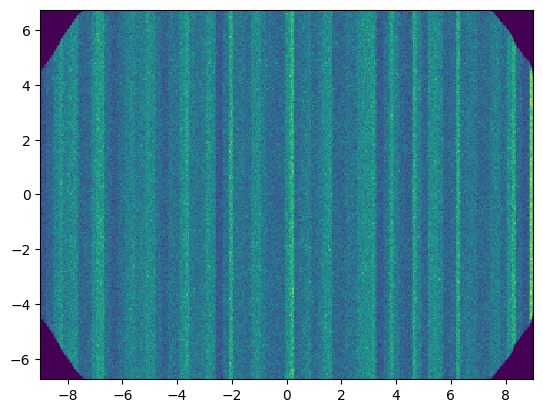

In [6]:
fig, ax = plt.subplots()
r.plot(ax)